# EDB: geometry creation

This example shows how you can use EDB to create a layout.
## Final expected project

<img src="_static/diff_via.png" width="500">

## Import EDB layout object
Import the EDB layout object and initialize it on version 2023 R2.

In [1]:
import os
import tempfile

import pyedb

temp_dir = tempfile.TemporaryDirectory(suffix=".ansys")
aedb_path = os.path.join(temp_dir.name, "create_via.aedb")
print(f"AEDB file path: {aedb_path}")

# Select EDB version (change it manually if needed, e.g. "2024.2")
edb_version = "2024.2"
print(f"EDB version: {edb_version}")

edb = pyedb.Edb(edbpath=aedb_path, edbversion=edb_version)

AEDB file path: C:\Users\ansys\AppData\Local\Temp\tmprv6cj7av.ansys\create_via.aedb
EDB version: 2024.2


PyEDB INFO: StdOut is enabled


PyEDB INFO: Logger is initialized in EDB.


PyEDB INFO: legacy v0.34.3


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


--- Logging error ---
Traceback (most recent call last):
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log' -> 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log.1'
Call stack:
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\actions-runner

PyEDB INFO: EDB C:\Users\ansys\AppData\Local\Temp\tmprv6cj7av.ansys\create_via.aedb created correctly.


PyEDB INFO: EDB initialized.


--- Logging error ---
Traceback (most recent call last):
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log' -> 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log.1'
Call stack:
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\actions-runner

## Add stackup layers
Add stackup layers.
A stackup can be created layer by layer or imported from a CSV file or XML file.

In [2]:
edb.stackup.add_layer("GND")
edb.stackup.add_layer("Diel", "GND", layer_type="dielectric", thickness="0.1mm", material="FR4_epoxy")
edb.stackup.add_layer("TOP", "Diel", thickness="0.05mm")

## Create signal net and ground planes
Create a signal net and ground planes.

In [3]:
points = [[0.0, 0], [100e-3, 0.0]]
edb.modeler.create_trace(points, "TOP", width=1e-3)
points = [[0.0, 1e-3], [0.0, 10e-3], [100e-3, 10e-3], [100e-3, 1e-3], [0.0, 1e-3]]
edb.modeler.create_polygon(points, "TOP")
points = [[0.0, -1e-3], [0.0, -10e-3], [100e-3, -10e-3], [100e-3, -1e-3], [0.0, -1e-3]]
edb.modeler.create_polygon(points, "TOP")

## Create vias with parametric positions
Create vias with parametric positions.

In [4]:
edb.padstacks.create("MyVia")
edb.padstacks.place([5e-3, 5e-3], "MyVia")
edb.padstacks.place([15e-3, 5e-3], "MyVia")
edb.padstacks.place([35e-3, 5e-3], "MyVia")
edb.padstacks.place([45e-3, 5e-3], "MyVia")
edb.padstacks.place([5e-3, -5e-3], "MyVia")
edb.padstacks.place([15e-3, -5e-3], "MyVia")
edb.padstacks.place([35e-3, -5e-3], "MyVia")
edb.padstacks.place([45e-3, -5e-3], "MyVia")

PyEDB INFO: Padstack MyVia create correctly


--- Logging error ---
Traceback (most recent call last):
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log' -> 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log.1'
Call stack:
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\actions-runner

## Generate geometry plot

PyEDB INFO: Plot Generation time 0.109


--- Logging error ---
Traceback (most recent call last):
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log' -> 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log.1'
Call stack:
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\actions-runner

(<Figure size 6000x3000 with 1 Axes>, <Axes: title={'center': 'Edb Top View'}>)

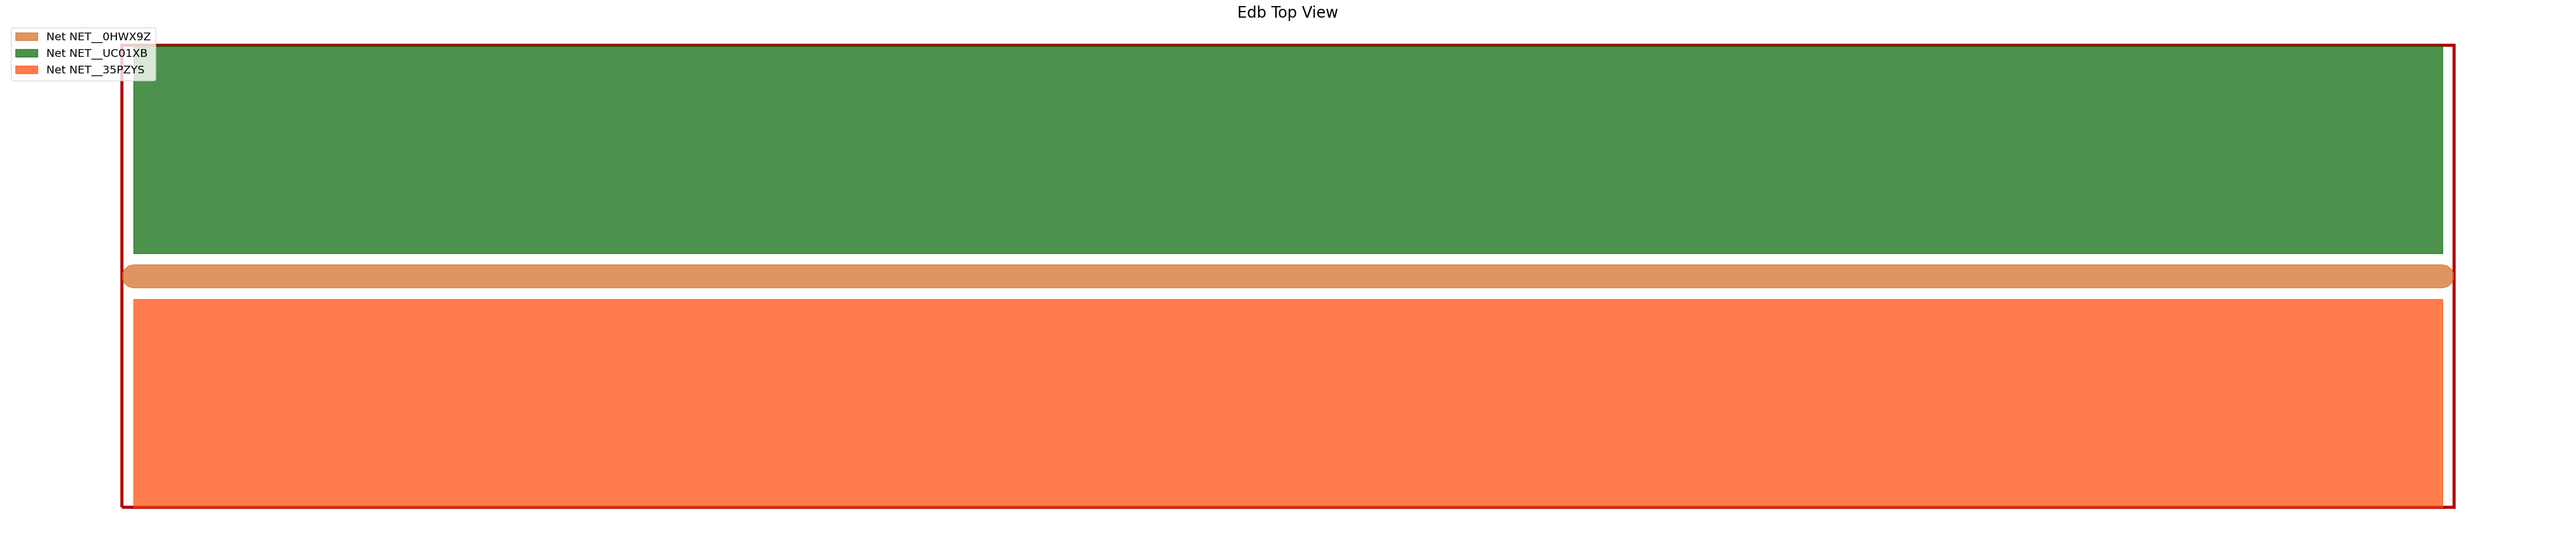

In [5]:
edb.nets.plot(None, color_by_net=True)

## Generate stackup plot

In [6]:
edb.stackup.plot(plot_definitions="MyVia")

C:\actions-runner\_work\pyedb\pyedb\.venv\lib\site-packages\pyedb\dotnet\edb_core\stackup.py:2868: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyedb\\pyedb\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

## Save and close EDB
Save and close EDB.

In [7]:
if edb:
    edb.save_edb()
    edb.close_edb()
print("EDB saved correctly to {}. You can import in AEDT.".format(aedb_path))

PyEDB INFO: EDB file save time: 0.00ms


PyEDB INFO: EDB file release time: 0.00ms


EDB saved correctly to C:\Users\ansys\AppData\Local\Temp\tmprv6cj7av.ansys\create_via.aedb. You can import in AEDT.


--- Logging error ---
Traceback (most recent call last):
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log' -> 'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyedb_ansys.log.1'
Call stack:
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\actions-runner\_work\_tool\Python\3.10.11\x64\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\actions-runner

### Clean up temporary directory

The following command removes the project and the temporary directory.
If you'd like to save this project, save it to a folder of your choice
prior to running the following cell.

In [8]:
temp_dir.cleanup()